In [1]:
import seaborn as sns
import pandas as pd
import numpy as npp
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('College_Data',index_col = 0)

In [12]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


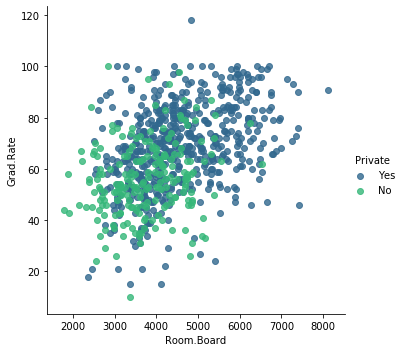

In [16]:
sns.lmplot(x='Room.Board',y = 'Grad.Rate',data = df,hue = 'Private',fit_reg=False,palette = 'viridis')

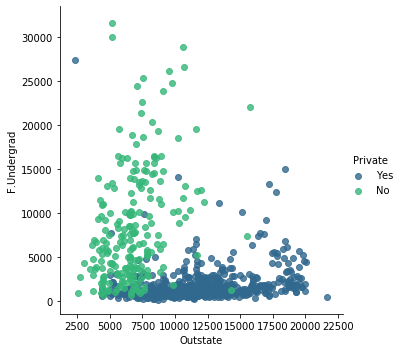

In [19]:
sns.lmplot(x='Outstate',y = 'F.Undergrad',data = df,hue = 'Private',fit_reg=False,palette = 'viridis')

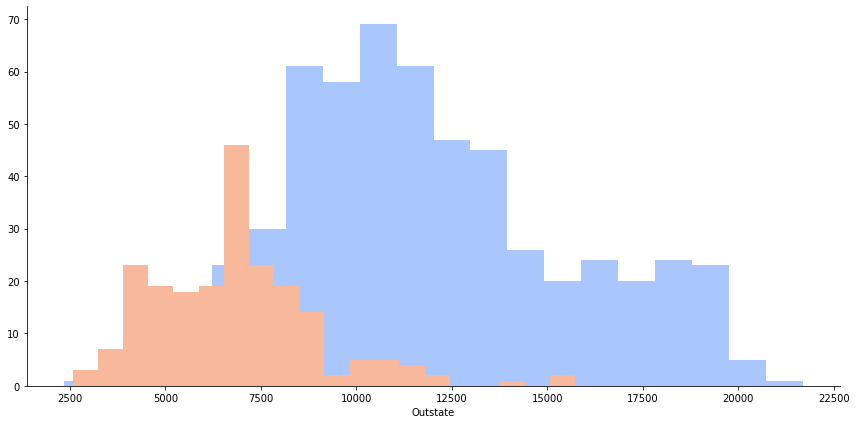

In [23]:
g = sns.FacetGrid(df,hue='Private',palette='coolwarm',height = 6,aspect = 2)
g = g.map(plt.hist,'Outstate',bins = 20)

In [24]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans()

In [28]:
km.fit(df.drop('Private',axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
km.cluster_centers_

array([[2.74032673e+03, 1.75347525e+03, 5.21366337e+02, 4.51188119e+01,
        7.47920792e+01, 2.03009901e+03, 2.00465347e+02, 1.68582178e+04,
        5.33167327e+03, 5.78613861e+02, 9.92069307e+02, 8.64059406e+01,
        9.28019802e+01, 1.07900990e+01, 3.56930693e+01, 1.53109406e+04,
        7.85445545e+01],
       [1.03985774e+03, 7.64794979e+02, 3.31585774e+02, 1.86736402e+01,
        4.50669456e+01, 1.42401255e+03, 4.86493724e+02, 7.53047280e+03,
        3.71745607e+03, 5.32711297e+02, 1.39015900e+03, 6.20125523e+01,
        6.91924686e+01, 1.51677824e+01, 1.81589958e+01, 6.72692050e+03,
        5.74644351e+01],
       [9.65122642e+03, 6.62150943e+03, 2.69713208e+03, 3.05094340e+01,
        6.22264151e+01, 1.41767547e+04, 3.19779245e+03, 8.25915094e+03,
        4.18735849e+03, 6.08584906e+02, 1.87371698e+03, 8.37735849e+01,
        8.91698113e+01, 1.60584906e+01, 1.61320755e+01, 9.63915094e+03,
        6.00000000e+01],
       [7.63142857e+03, 2.76785714e+03, 1.02357143e+03, 7.000

In [33]:
def converter(Private):
    if Private == 'yes':
        return 1
    else:
        return 0

In [34]:
df['cluster'] = df['Private'].apply(converter)

In [37]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
confusion_matrix(df['cluster'],km.labels_)

array([[101, 239,  53,   7,  95,  14, 252,  16],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)